# Visualising MNIST and MNIST-1D using t-SNE in pixel space

In [1]:
# Run this if using Colab

# !pip install opentsne

In [2]:
%matplotlib inline

import pylab as plt
import numpy as np

from openTSNE import TSNE

# Figure style (loading from the web to make running in a Colab easier)
plt.style.use('https://github.com/greydanus/mnist1d/raw/master/notebooks/mpl_style.txt')

In [3]:
# Load MNIST

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
X_2d = mnist.data.values
y_2d = mnist.target.values.astype('int')

print(X_2d.shape)

(70000, 784)


In [4]:
Z_2d = TSNE(n_jobs=-1, verbose=True).fit(X_2d)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=-1, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 49.61 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 3.65 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 2.43 seconds
===> Running optimization with exaggeration=12.00, lr=5833.33 for 250 iterations...
Iteration   50, KL divergence 5.9916, 50 iterations in 4.9270 sec
Iteration  100, KL divergence 5.8277, 50 iterations in 4.7073 sec
Iteration  150, KL divergence 5.7787, 50 iterations in 4.6496 sec
Iteration  200, KL divergence 5.7614, 50 iterations in 5.4664 sec
Iteration  250, KL divergence 5.7526, 50 iterations in 5.2084 sec
   --> Time elapsed: 24.96 seconds
===> Running optimization with exaggeration=1.00, lr=70000.

In [5]:
# Load MNIST-1D
# (loading from the web to make running in a Colab easier)

from urllib.request import urlopen
import pickle

url = 'https://github.com/greydanus/mnist1d/raw/master/mnist1d_data.pkl'
mnist1d = pickle.load(urlopen(url))

X_1d = np.concatenate((mnist1d['x'], mnist1d['x_test']))
y_1d = np.concatenate((mnist1d['y'], mnist1d['y_test']))

print(X_1d.shape)

(5000, 40)


In [6]:
Z_1d = TSNE(n_jobs=-1, verbose=True).fit(X_1d)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=-1, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 2.43 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.29 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.02 seconds
===> Running optimization with exaggeration=12.00, lr=416.67 for 250 iterations...
Iteration   50, KL divergence 4.8808, 50 iterations in 2.0153 sec
Iteration  100, KL divergence 4.8335, 50 iterations in 1.6186 sec
Iteration  150, KL divergence 4.8343, 50 iterations in 1.9780 sec
Iteration  200, KL divergence 4.8343, 50 iterations in 1.3721 sec
Iteration  250, KL divergence 4.8344, 50 iterations in 1.1735 sec
   --> Time elapsed: 8.17 seconds
===> Running optimization with exaggeration=1.00, lr=5000.00 f

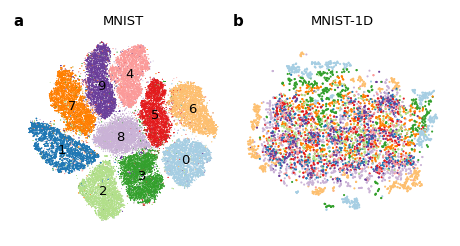

In [7]:
# Define 10 nice colors
col = np.array(['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
                '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a'])

fig, axs = plt.subplots(ncols=2, figsize=(6.5/2, 1.7))#, layout=None)

axs[0].axis('equal')
axs[0].scatter(Z_2d[:,0], Z_2d[:,1], c=col[y_2d], s=1, 
               edgecolors='none', rasterized=True)
axs[0].set_title('MNIST')
axs[0].axis('off')
    
for k in range(10):
    mu = np.median(Z_2d[y_2d == k, :], axis=0)
    axs[0].text(mu[0], mu[1], k, ha='center', va='center', fontsize=7)
    
axs[1].axis('equal')
axs[1].scatter(Z_1d[:,0], Z_1d[:,1], c=col[y_1d], s=5, 
               edgecolors='none', rasterized=True)
axs[1].set_title('MNIST-1D')
axs[1].axis('off')

fig.text(0, .93, 'a', fontsize=8, weight='bold')
fig.text(.5, .93, 'b', fontsize=8, weight='bold')
    
fig.savefig('figures/tsne.png', dpi=300)
fig.savefig('figures/tsne.pdf')